In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import sklearn
from shapely.geometry import multipolygon
import shapely.wkt
import geopandas as gpd
import sodapy as Socrata
import requests

# Read in data

In [26]:


full = pd.read_csv('insight/Cross_val_model_set_with_income_feb5.csv')
#full = pd.read_csv('insight/matched_data_1_24.csv')
#geo = pd.read_csv('insight/lead_index.csv')
#ACS = pd.read_csv('insight/ACS_data.csv')
#data_nona=pd.read_csv('insight/model_merged_census.csv')

#from shapely import wkt
#geo['geometry'] = geo['geometry'].apply(wkt.loads)
#geo = gpd.GeoDataFrame(geo, geometry='geometry')

C:\Users\Eric\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


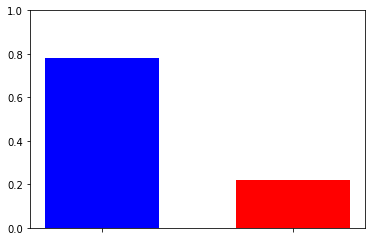

In [8]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = [0.78,0.22]
bars = ('', '')
y_pos = np.arange(len(bars))
data_color = ['b','r']
# Create bars
plt.bar(y_pos, height, width=.6, color=data_color)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('Proportion of Service Line Type') 
plt.ylim((0,1))
# Show graphic
plt.show()


## EDA Year Built

In [27]:
full.rename(columns = {"Pipe Material":'PipeMaterial', "Construction Year":'YearBuilt'}, inplace=True)

In [28]:
full = full[(full['YearBuilt']>1850) & (full['YearBuilt']<2016) ]
full['YearBuilt'].replace(20000, 1910.0, inplace=True)
full['YearBuilt'].replace(2108.0, 2018.0, inplace=True)
full['YearBuilt'].replace(2916.0, 2015.0, inplace=True)


In [43]:
box_year = full[~((full['PipeMaterial']=='Lead') & (full['YearBuilt']>1988))]
#box_year[box_year['PipeMaterial']==].YearBuilt.max()

In [ ]:


df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

Text(-28.81,0.5,'')

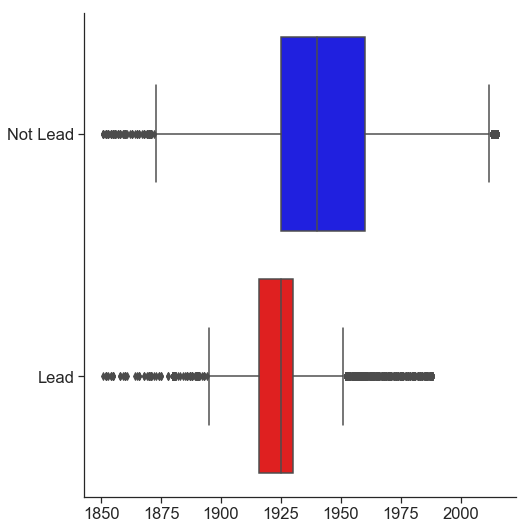

In [59]:
sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
data_color = ['#0000FF','#FF0000']
sns.set_palette(sns.color_palette(data_color))
ax1 = sns.catplot(y='PipeMaterial', x='YearBuilt', kind = 'box', data=box_year,height=8, orient='h')
plt.title('')
plt.xlabel('')
    
#ax1.set_xlabel('')
#ax1.spines['bottom'].set_visible(False)
plt.ylabel('')

## Heat Maps

In [79]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely import wkt
from shapely.geometry import Point
from shapely.geometry import multipolygon
from shapely.ops import nearest_points

NYS_counties = gpd.read_file("NYshapefile/cugir-007865/cty036.shp")
NYC_county_shapes = NYS_counties.loc[(NYS_counties['NAME']=='Kings')|(NYS_counties['NAME']=='Queens')|(NYS_counties['NAME']=='New York')|(NYS_counties['NAME']=='Bronx')|(NYS_counties['NAME']=='Richmond')]
NYC_county_shapes = NYC_county_shapes.drop([62,65])


geo_frame = pd.read_csv('insight/lead_dist_in_progress.csv')
geo_frame['geometry'] = geo_frame['geometry'].apply(wkt.loads)
geo_frame = gpd.GeoDataFrame(geo_frame, geometry='geometry')
geo_frame.drop(columns=['Unnamed: 0'],inplace=True)

In [80]:
def haversine(coord1, coord2):
    import math
    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1.x, coord1.y
    lon2, lat2 = coord2.x, coord2.y
    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    #meters = round(meters)
    km = round(km, 3)
    return(km)
    #print(f"Distance: {meters} m")
    #print(f"Distance: {km} km")

In [101]:
%matplotlib inline
import geopandas as gpd
import numpy as np
from scipy import ndimage

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

pylab.rcParams['figure.figsize'] = 8, 6

color = 'jet'
color = LinearSegmentedColormap.from_list('mycmap', ['white', 'blue', 'cyan', 'green', 'yellow','orange','red'])
def heatmap(d, bins=(100,100), smoothing=1.3, cmap=color):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    x = x + [-73.65, -74.35]
    y = y + [41,40.3]
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    
    with np.errstate(divide='ignore'):
        logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    fig, ax = plt.subplots(1)
    NYC_county_shapes.plot(ax = ax, alpha = 0.5,facecolor='', edgecolor = 'black', legend=True, lw=1.5)
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.grid(b=None)
    ax.set_ylim([40.45,41])
    ax.set_xlim([-74.35,-73.65])
    #p = [b[0],b[1],b[2],b[3],b[4]]
    #ax.add_collection(p)
    #NYC_county_shapes['geometry'].plot(ax=ax)
    #plt.title('Logarithmic Heat Map of NYC Lead Sercive Lines')
    plt.show()

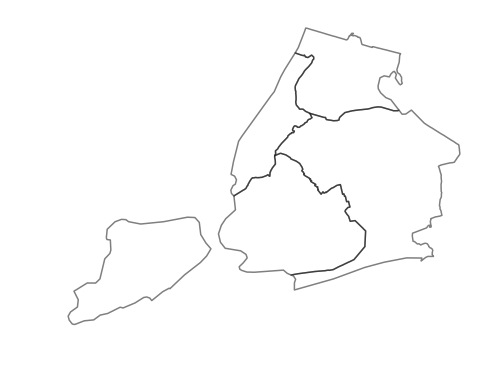

In [104]:
#heatmap(geo_frame[geo_frame['PipeMaterial']=='Lead'], bins=150, smoothing=1.5)
fig, ax = plt.subplots(1)
NYC_county_shapes.plot(ax = ax, alpha = 0.5,facecolor='', edgecolor = 'black', legend=True, lw=1.5)
plt.axis('off')
plt.grid(b=None)


## Median Income

In [98]:
indexNames = data_nona[data_nona['Median_Income'] == '-' ].index
income = data_nona.drop(indexNames)
income.Median_Income.replace('250,000+',250000,inplace=True)
income.Median_Income = income.Median_Income.astype(float)

In [103]:
income['Pipe Material'].replace(0,'Not Lead',inplace=True)
income['Pipe Material'].replace(1,'Lead',inplace=True)

income_lead = income[income['Pipe Material']=='Lead']
income_nolead = income[income['Pipe Material']=='Not Lead']

In [107]:
income_lead.Median_Income.describe()

count    119201.000000
mean      63323.846880
std       33163.670402
min        9959.000000
25%       39750.000000
50%       57275.000000
75%       77500.000000
max      250000.000000
Name: Median_Income, dtype: float64

In [108]:
income_nolead.Median_Income.describe()

count    365858.000000
mean      64196.366035
std       32413.138658
min        9959.000000
25%       39892.000000
50%       60370.000000
75%       81389.000000
max      250000.000000
Name: Median_Income, dtype: float64

In [153]:
income.dropna().groupby('census_tract')['Median_Income']

In [132]:
income_bottom = income[(income['census_tract']==352) | (income['census_tract']==910) | (income['census_tract']==119) | (income['census_tract']==908) | (income['census_tract']==1156)  ]
income_top = income[(income['census_tract']==130) | (income['census_tract']==142) | (income['census_tract']==21) | (income['census_tract']==33) | (income['census_tract']==145)  ]

In [133]:
import matplotlib.pyplot as plt
from matplotlib import rc


33     1294
130     919
21      918
145     829
142     376
Name: census_tract, dtype: int64

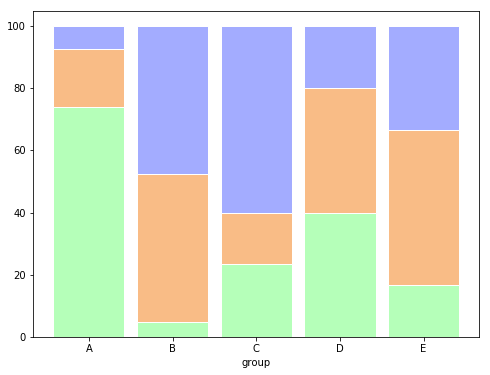

In [137]:
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()


In [141]:
income.dropna().groupby('census_tract')['Median_Income'].mean().sort_values(ascending=False).head(6)

census_tract
130    250000.0
142    221176.0
21     215745.0
33     202153.0
145    179722.0
52     174286.0
Name: Median_Income, dtype: float64

In [140]:
income_top.groupby('census_tract')['Pipe Material'].value_counts()

census_tract  Pipe Material
21            Not Lead          675
              Lead              243
33            Not Lead         1038
              Lead              256
130           Not Lead          648
              Lead              271
142           Not Lead          290
              Lead               86
145           Not Lead          540
              Lead              289
Name: Pipe Material, dtype: int64

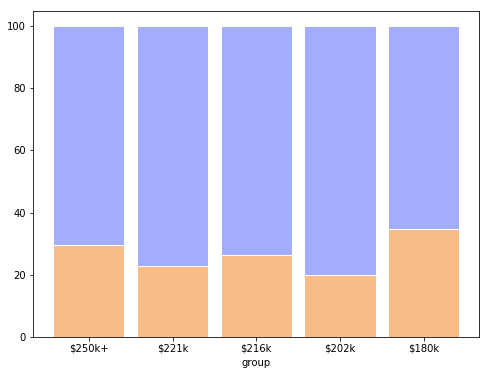

In [151]:
raw_data = {'Lead': [271, 86, 243, 256, 289], 'Nonlead': [648,290,675,1038,540]}
df = pd.DataFrame(raw_data)
r = [0,1,2,3,4]

totals = [i+j for i,j in zip(df['Lead'], df['Nonlead'])]
leadBars = [i / j * 100 for i,j in zip(df['Lead'], totals)]
NonleadBars = [i / j * 100 for i,j in zip(df['Nonlead'], totals)]



# plot
barWidth = 0.85
names = ('$250k+','$221k','$216k','$202k','$180k')
# Create green Bars
plt.bar(r, leadBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, NonleadBars, bottom=leadBars, color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()


In [149]:
income.dropna().groupby('census_tract')['Median_Income'].mean().sort_values().head(6)

census_tract
352      9959.0
910     10674.0
119     11981.0
908     12008.0
808     12283.0
1156    12902.0
Name: Median_Income, dtype: float64

In [150]:
income_bottom.groupby('census_tract')['Pipe Material'].value_counts()

census_tract  Pipe Material
119           Not Lead         502
              Lead             137
352           Not Lead         358
              Lead             171
908           Not Lead          79
              Lead              13
910           Not Lead          28
              Lead               4
1156          Not Lead         122
              Lead              27
Name: Pipe Material, dtype: int64

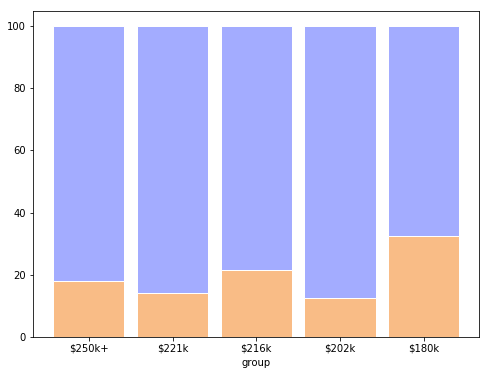

In [152]:
raw_data = {'Lead': [27, 13, 137, 4, 171], 'Nonlead': [122,79,502,28,358]}
df = pd.DataFrame(raw_data)
r = [0,1,2,3,4]

totals = [i+j for i,j in zip(df['Lead'], df['Nonlead'])]
leadBars = [i / j * 100 for i,j in zip(df['Lead'], totals)]
NonleadBars = [i / j * 100 for i,j in zip(df['Nonlead'], totals)]



# plot
barWidth = 0.85
names = ('$250k+','$221k','$216k','$202k','$180k')
# Create green Bars
plt.bar(r, leadBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, NonleadBars, bottom=leadBars, color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()


In [205]:
df = pd.DataFrame() 

for ct in income.dropna()['census_tract'].unique():
    temp = income[income['census_tract']==ct]
    Med_inc = temp['Median_Income'].mean()
    percent_lead = temp[temp['Pipe Material']=='Lead'].shape[0]/temp.shape[0]
    pov = temp['percent_below_poverty'].mean()
    total_pop = temp['Total_pop'].mean()
    white = temp['white'].mean()/total_pop
    black = temp['black'].mean()/total_pop
    asian = temp['asian'].mean()/total_pop
    hispanic = temp['hispanic'].mean()/total_pop
    df = df.append(pd.DataFrame({'census_tract':[ct],'Med_Income':[Med_inc],'Percent_Lead':[percent_lead],'Poverty':[pov],'white':[white],'black':[black],'asian':[asian],'hispanic':[hispanic]}))

In [223]:
df.corr()

,census_tract,Med_Income,Percent_Lead,Poverty,white,black,asian,hispanic
census_tract,1.000000,-0.148898,-0.290305,-0.047083,-0.252463,0.244594,0.188587,0.196175
Med_Income,-0.148898,1.000000,0.031967,-0.684239,0.455996,-0.284443,0.064099,0.439487
Percent_Lead,-0.290305,0.031967,1.000000,-0.009278,0.202910,-0.237515,-0.014756,-0.163588
Poverty,-0.047083,-0.684239,-0.009278,1.000000,-0.307369,0.161481,-0.131796,-0.487630
white,-0.252463,0.455996,0.202910,-0.307369,1.000000,-0.807813,0.024760,0.191353
black,0.244594,-0.284443,-0.237515,0.161481,-0.807813,1.000000,-0.459197,0.107083
asian,0.188587,0.064099,-0.014756,-0.131796,0.024760,-0.459197,1.000000,0.165592
hispanic,0.196175,0.439487,-0.163588,-0.487630,0.191353,0.107083,0.165592,1.000000


In [228]:
list(range(8,10))

[8, 9]

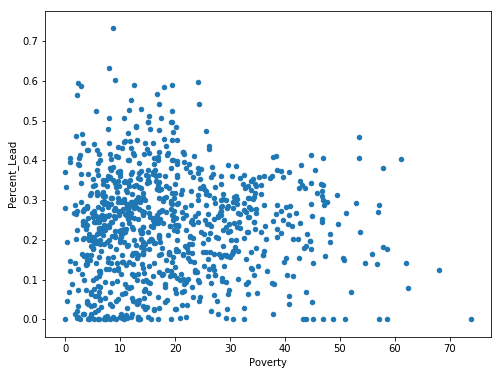

In [216]:
df.plot.scatter(x='Poverty',y ='Percent_Lead')

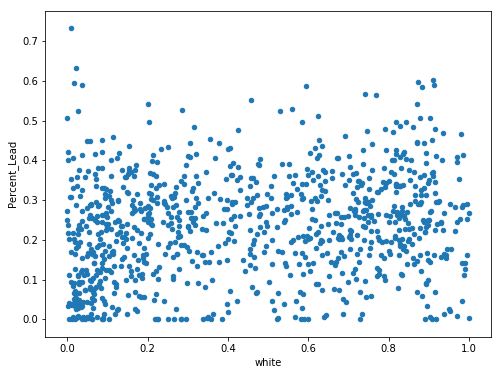

In [218]:
df.plot.scatter(x='white',y ='Percent_Lead')

In [2]:
df[df['black']>0.1].plot.scatter(x='black',y ='Percent_Lead')

NameError: name 'df' is not defined

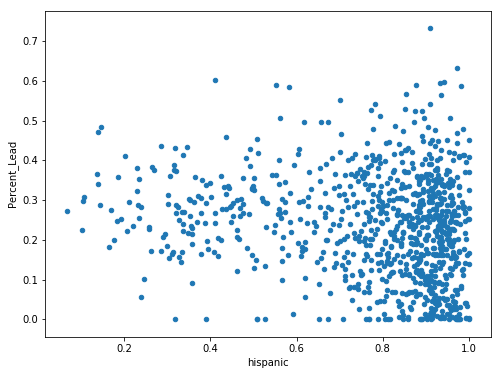

In [220]:
df.plot.scatter(x='hispanic',y ='Percent_Lead')

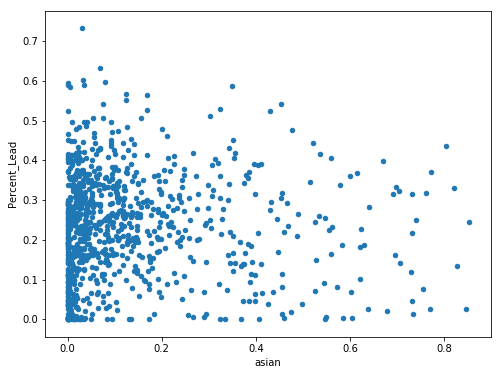

In [221]:
df.plot.scatter(x='asian',y ='Percent_Lead')

# Compute Nearest Neighbor

In [60]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely import wkt
from shapely.geometry import Point
from shapely.geometry import multipolygon
from shapely.ops import nearest_points

geo_frame = pd.read_csv('insight/lead_dist_in_progress.csv')
geo_frame['geometry'] = geo_frame['geometry'].apply(wkt.loads)
geo_frame = gpd.GeoDataFrame(geo_frame, geometry='geometry')
geo_frame.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
def haversine(coord1, coord2):
    import math
    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1.x, coord1.y
    lon2, lat2 = coord2.x, coord2.y
    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    #meters = round(meters)
    km = round(km, 3)
    return(km)
    #print(f"Distance: {meters} m")
    #print(f"Distance: {km} km")

In [ ]:
%%time
delta_lat = .0009
delta_lon = .00012



temp = geo_frame

    for index, row in geo_frame.iterrows():
    
        point = row.geometry
        px = point.x
        py = point.y
        temp = geo_frame[(geo_frame['latitude']<py+delta_lat) & (geo_frame['longitude']<px+delta_lon) & (geo_frame['latitude']>py-delta_lat) & (geo_frame['longitude']>px-delta_lon)]
    
        while (len(temp.PipeMaterial.drop(index, axis=0).value_counts()) != 2):
            delta_lat= 2*delta_lat
            delta_lon= 2*delta_lon
            temp = geo_frame[(geo_frame['latitude']<py+delta_lat) & (geo_frame['longitude']<px+delta_lon) & (geo_frame['latitude']>py-delta_lat) & (geo_frame['longitude']>px-delta_lon)]

        if (row.PipeMaterial == 'Lead'):
            multipoint = temp[temp['PipeMaterial'] == 'Lead'].drop(index, axis=0).geometry.unary_union
            queried_geom, nearest_geom = nearest_points(point, multipoint)
            geo_frame.loc[index, 'nearest_LSL_dist'] = haversine(point,nearest_geom)
    
            multipoint = temp[temp['PipeMaterial'] == 'Not Lead'].geometry.unary_union
            queried_geom, nearest_geom = nearest_points(point, multipoint)
            geo_frame.loc[index, 'nearest_NLSL_dist'] = haversine(point,nearest_geom)
        elif (row.PipeMaterial == 'Not Lead'):
            multipoint = temp[temp['PipeMaterial'] == 'Lead'].geometry.unary_union
            queried_geom, nearest_geom = nearest_points(point, multipoint)
            geo_frame.loc[index, 'nearest_LSL_dist'] = haversine(point,nearest_geom)
    
            multipoint = temp[temp['PipeMaterial'] == 'Not Lead'].drop(index, axis=0).geometry.unary_union
            queried_geom, nearest_geom = nearest_points(point, multipoint)
            geo_frame.loc[index, 'nearest_NLSL_dist'] = haversine(point,nearest_geom)




In [61]:
l = geo_frame[geo_frame['PipeMaterial']=='Lead']
n =  geo_frame[geo_frame['PipeMaterial']=='Not Lead']

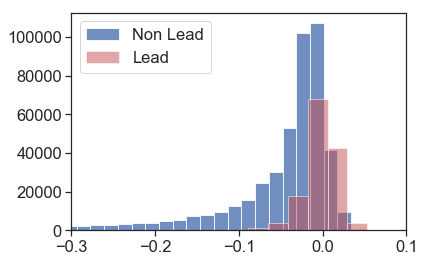

In [71]:
geo_frame['net_dist'] = geo_frame['nearest_NLSL_dist']-geo_frame['nearest_LSL_dist']
l = geo_frame[geo_frame['PipeMaterial']=='Lead'].dropna()
n =  geo_frame[geo_frame['PipeMaterial']=='Not Lead'].dropna()
from matplotlib import pyplot


#
x = l.net_dist
y = n.net_dist
pyplot.hist(y, bins=300, alpha=0.8, label='Non Lead',density=False, color = 'b')
pyplot.hist(x, bins=300, alpha=0.5, label='Lead',density=False, color = 'r')
pyplot.legend(loc='upper left')
pyplot.xlim(-.3,.1)
#plt.title('Nearest Neighbor Comparison (Density)')
#plt.xlabel('Distance (km)')
pyplot.show()